# Creating Dataset

In [ ]:

import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
# This the code for scrapping the data by using the beautifulsoup 
import bs4
import requests

#Creating the function to scrap the web page.
def scrapWebPage(url, articleType):                  
  response = requests.get(url)

  if response is not None:
    html = bs4.BeautifulSoup(response.text, 'html.parser')

    #title = html.select("#firstHeading")[0].text
    paragraphs = html.select("p")
    articleText = ""
    for para in paragraphs:
        articleText +=  para.text.strip('\n')
        #print (para.text)

    # just grab the text up to contents as stated in question
    #intro = '\n'.join([ para.text for para in paragraphs[0:5]])
    #print (intro)
    data = {'category': articleType, 'content': articleText}
    return data



In [ ]:
alllinks = []
alllinks.append(scrapWebPage("https://www.forbes.com/sites/bernardmarr/2020/07/17/5-ways-self-driving-cars-could-make-our-world-and-our-lives-better/?sh=17181db742a3","positive"))
alllinks.append(scrapWebPage("https://www.startupgrind.com/blog/5-reasons-you-should-embrace-self-driving-cars/","positive"))
alllinks.append(scrapWebPage("https://www.vox.com/future-perfect/2020/2/14/21063487/self-driving-cars-autonomous-vehicles-waymo-cruise-uber","negative"))
alllinks.append(scrapWebPage("https://www.iotforall.com/dangers-of-autonomous-vehicles-worldwide-adoption","negative"))
alllinks.append(scrapWebPage("https://www.theatlantic.com/technology/archive/2018/12/7-arguments-against-the-autonomous-vehicle-utopia/578638/","negative"))
alllinks.append(scrapWebPage("https://www.mosaic51.com/featured/11-benefits-of-self-driving-cars-how-will-your-life-improve/","positive"))

alllinks.append(scrapWebPage("https://www.theatlantic.com/technology/archive/2018/12/7-arguments-against-the-autonomous-vehicle-utopia/578638/","negative"))
alllinks.append(scrapWebPage("https://www.motortrend.com/features/self-driving-cars-digital-divide-mobility/","positive"))




In [ ]:
import csv  
def savingToDataframe(alllinks):
  rows = []
  fields = ["File_Name","Content","Category","Complete_Filename"]
  for i in range(0, len(alllinks)):
    Content = alllinks[i]
    filename = "FileName_"+ str(i)
    category = Content['category']
    Complete_Filename = filename
    rows.append([filename, Content['content'],category, Complete_Filename])
  df = pd.DataFrame(rows, columns=fields)
  print(df)
  return df

df = savingToDataframe(alllinks)  

    File_Name  ... Complete_Filename
0  FileName_0  ...        FileName_0
1  FileName_1  ...        FileName_1
2  FileName_2  ...        FileName_2
3  FileName_3  ...        FileName_3
4  FileName_4  ...        FileName_4
5  FileName_5  ...        FileName_5
6  FileName_6  ...        FileName_6
7  FileName_7  ...        FileName_7

[8 rows x 4 columns]


In [ ]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,FileName_0,With more than 40 companies actively investing...,positive,FileName_0
1,FileName_1,2016 has been an exciting year so far for tech...,positive,FileName_1
2,FileName_2,"In the age of AI advances, self-driving cars t...",negative,FileName_2
3,FileName_3,Autonomous vehicles are one of the most talked...,negative,FileName_3
4,FileName_4,All the ways the self-driving future won’t com...,negative,FileName_4


In [ ]:
df.to_csv('dataset_file.csv', index=False)

In [ ]:
#!unzip bbc_text.zip

In [ ]:
df.head(6)

,File_Name,Content,Category,Complete_Filename
0,FileName_0,With more than 40 companies actively investing...,positive,FileName_0
1,FileName_1,2016 has been an exciting year so far for tech...,positive,FileName_1
2,FileName_2,"In the age of AI advances, self-driving cars t...",negative,FileName_2
3,FileName_3,Autonomous vehicles are one of the most talked...,negative,FileName_3
4,FileName_4,All the ways the self-driving future won’t com...,negative,FileName_4
5,FileName_5,Learn about 11 of the benefits self driving ca...,positive,FileName_5


In [ ]:
df.tail(10)

,File_Name,Content,Category,Complete_Filename
0,FileName_0,With more than 40 companies actively investing...,positive,FileName_0
1,FileName_1,2016 has been an exciting year so far for tech...,positive,FileName_1
2,FileName_2,"In the age of AI advances, self-driving cars t...",negative,FileName_2
3,FileName_3,Autonomous vehicles are one of the most talked...,negative,FileName_3
4,FileName_4,All the ways the self-driving future won’t com...,negative,FileName_4
5,FileName_5,Learn about 11 of the benefits self driving ca...,positive,FileName_5
6,FileName_6,All the ways the self-driving future won’t com...,negative,FileName_6
7,FileName_7,Ask nine futurists what life will be like in 5...,positive,FileName_7


In [ ]:
import pandas as pd
fields = ["File_Name","Content","Category","Complete_Filename"]

df = pd.read_csv('dataset_file.csv', names=fields,header=0)
print(df)

    File_Name  ... Complete_Filename
0  FileName_0  ...        FileName_0
1  FileName_1  ...        FileName_1
2  FileName_2  ...        FileName_2
3  FileName_3  ...        FileName_3
4  FileName_4  ...        FileName_4
5  FileName_5  ...        FileName_5
6  FileName_6  ...        FileName_6
7  FileName_7  ...        FileName_7

[8 rows x 4 columns]


In [ ]:
pip install vega==1.3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

In [ ]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

In [ ]:
df['News_length'] = df['Content'].str.len()


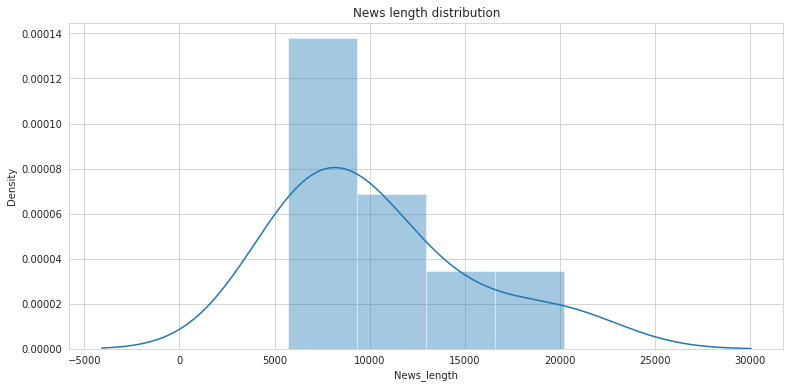

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [ ]:
df['News_length'].describe()

count        8.000000
mean     10285.375000
std       4958.568599
min       5722.000000
25%       6463.500000
50%       9593.000000
75%      11070.750000
max      20234.000000
Name: News_length, dtype: float64

In [ ]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

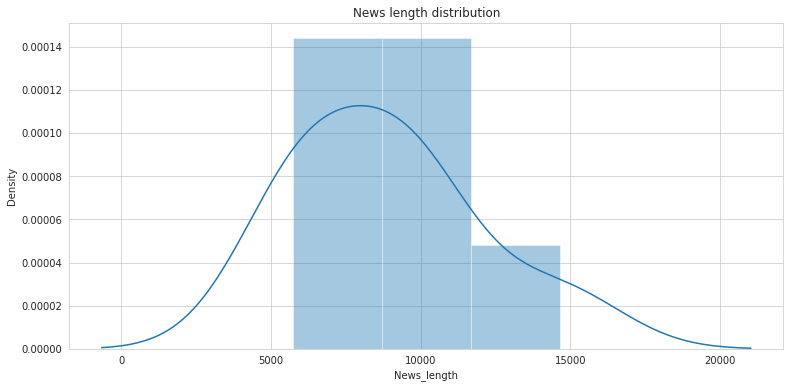

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

In [ ]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

2

In [ ]:
df_more10k['Content'].iloc[0]

"In the age of AI advances, self-driving cars turned out to be harder than people expected.    Finding the best ways to do good. \n  When it comes to self-driving cars, the future was supposed to be now. In 2020, you’ll be a “permanent backseat driver,” the Guardian predicted in 2015. “10 million self-driving cars will be on the road by 2020,” blared a Business Insider headline from 2016. Those declarations were accompanied by announcements from General Motors, Google’s Waymo, Toyota, and Honda that they’d be making self-driving cars by 2020. Elon Musk forecast that Tesla would do it by 2018 — and then, when that failed, by 2020. But the year is here — and the self-driving cars aren’t. Despite extraordinary efforts from many of the leading names in tech and in automaking, fully autonomous cars are still out of reach except in special trial programs. You can buy a car that will automatically brake for you when it anticipates a collision, or one that helps keep you in your lane, or even 

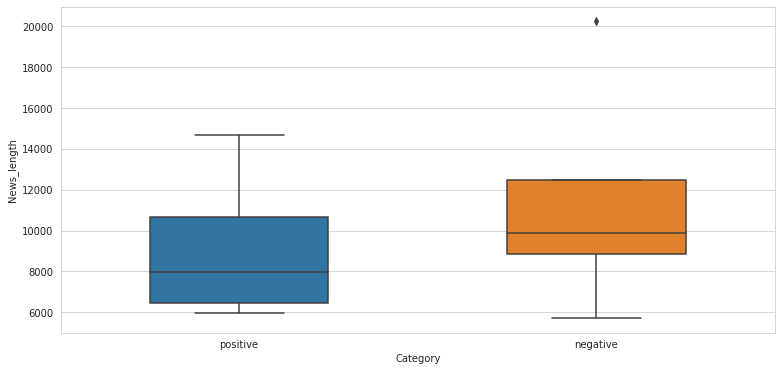

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

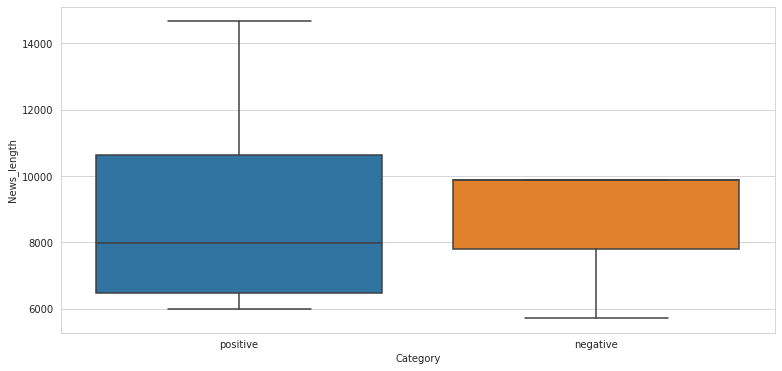

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');


In [ ]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)

In [ ]:

with open('News_dataset.pickle', 'rb') as data:
    df = pickle.load(data)

In [ ]:
df.head()

,File_Name,Content,Category,Complete_Filename,id,News_length
0,FileName_0,With more than 40 companies actively investing...,positive,FileName_0,1,6623
1,FileName_1,2016 has been an exciting year so far for tech...,positive,FileName_1,1,5985
2,FileName_2,"In the age of AI advances, self-driving cars t...",negative,FileName_2,1,20234
3,FileName_3,Autonomous vehicles are one of the most talked...,negative,FileName_3,1,5722
4,FileName_4,All the ways the self-driving future won’t com...,negative,FileName_4,1,9875


# Feature Engineering


In [ ]:

import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

with open('News_dataset.pickle', 'rb') as data:
    df = pickle.load(data)

In [ ]:
df.head()

,File_Name,Content,Category,Complete_Filename,id,News_length
0,FileName_0,With more than 40 companies actively investing...,positive,FileName_0,1,6623
1,FileName_1,2016 has been an exciting year so far for tech...,positive,FileName_1,1,5985
2,FileName_2,"In the age of AI advances, self-driving cars t...",negative,FileName_2,1,20234
3,FileName_3,Autonomous vehicles are one of the most talked...,negative,FileName_3,1,5722
4,FileName_4,All the ways the self-driving future won’t com...,negative,FileName_4,1,9875


In [ ]:
df.loc[1]['Content']

'2016 has been an exciting year so far for technologies that, until recently, have been confined to the world of science fiction dreams. Whether it’s 3D printing revolutionizing the Healthcare industry or the widespread commercial availability of VR technology, we’re continuing to witness amazing\xa0innovations that even just a few years ago seemed like distant possibilities at best.Another technological advancement causing widespread wonder is self-driving cars. We may not have arrived at a Jetsons-like future of flying automated vehicles just yet, but the self-driving car is getting closer and closer to becoming a widespread, viable method of transportation. And, while many are skeptical about the future of driverless and self-driving cars on the road, there’s actually a good deal of data and research to support the idea that self-driving cars may actually be better for our future.With that in mind, here are five reasons to embrace self-driving cars:It’s tough at first to wrap our mi

In [ ]:

# \r and \n
df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")

In [ ]:
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('"', '')

In [ ]:

# Lowercasing the text
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()

In [ ]:

punctuation_signs = list("?:!.,;")
df['Content_Parsed_3'] = df['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')

In [ ]:
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")

In [ ]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------------------------------------------
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [ ]:
df['Content_Parsed_5'] = lemmatized_text_list

In [ ]:

# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [ ]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
df['Content_Parsed_6'] = df['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_6'] = df['Content_Parsed_6'].str.replace(regex_stopword, '')

In [ ]:

df.loc[2]['Content']

"In the age of AI advances, self-driving cars turned out to be harder than people expected.    Finding the best ways to do good. \n  When it comes to self-driving cars, the future was supposed to be now. In 2020, you’ll be a “permanent backseat driver,” the Guardian predicted in 2015. “10 million self-driving cars will be on the road by 2020,” blared a Business Insider headline from 2016. Those declarations were accompanied by announcements from General Motors, Google’s Waymo, Toyota, and Honda that they’d be making self-driving cars by 2020. Elon Musk forecast that Tesla would do it by 2018 — and then, when that failed, by 2020. But the year is here — and the self-driving cars aren’t. Despite extraordinary efforts from many of the leading names in tech and in automaking, fully autonomous cars are still out of reach except in special trial programs. You can buy a car that will automatically brake for you when it anticipates a collision, or one that helps keep you in your lane, or even 

In [ ]:
df.loc[2]['Content_Parsed_1']

"In the age of AI advances, self-driving cars turned out to be harder than people expected. Finding the best ways to do good. When it comes to self-driving cars, the future was supposed to be now. In 2020, you’ll be a “permanent backseat driver,” the Guardian predicted in 2015. “10 million self-driving cars will be on the road by 2020,” blared a Business Insider headline from 2016. Those declarations were accompanied by announcements from General Motors, Google’s Waymo, Toyota, and Honda that they’d be making self-driving cars by 2020. Elon Musk forecast that Tesla would do it by 2018 — and then, when that failed, by 2020. But the year is here — and the self-driving cars aren’t. Despite extraordinary efforts from many of the leading names in tech and in automaking, fully autonomous cars are still out of reach except in special trial programs. You can buy a car that will automatically brake for you when it anticipates a collision, or one that helps keep you in your lane, or even a Tesla

In [ ]:
df.loc[2]['Content_Parsed_2']

"in the age of ai advances, self-driving cars turned out to be harder than people expected. finding the best ways to do good. when it comes to self-driving cars, the future was supposed to be now. in 2020, you’ll be a “permanent backseat driver,” the guardian predicted in 2015. “10 million self-driving cars will be on the road by 2020,” blared a business insider headline from 2016. those declarations were accompanied by announcements from general motors, google’s waymo, toyota, and honda that they’d be making self-driving cars by 2020. elon musk forecast that tesla would do it by 2018 — and then, when that failed, by 2020. but the year is here — and the self-driving cars aren’t. despite extraordinary efforts from many of the leading names in tech and in automaking, fully autonomous cars are still out of reach except in special trial programs. you can buy a car that will automatically brake for you when it anticipates a collision, or one that helps keep you in your lane, or even a tesla

In [ ]:
df.loc[2]['Content_Parsed_3']

"in the age of ai advances self-driving cars turned out to be harder than people expected finding the best ways to do good when it comes to self-driving cars the future was supposed to be now in 2020 you’ll be a “permanent backseat driver” the guardian predicted in 2015 “10 million self-driving cars will be on the road by 2020” blared a business insider headline from 2016 those declarations were accompanied by announcements from general motors google’s waymo toyota and honda that they’d be making self-driving cars by 2020 elon musk forecast that tesla would do it by 2018 — and then when that failed by 2020 but the year is here — and the self-driving cars aren’t despite extraordinary efforts from many of the leading names in tech and in automaking fully autonomous cars are still out of reach except in special trial programs you can buy a car that will automatically brake for you when it anticipates a collision or one that helps keep you in your lane or even a tesla model s (which — disc

In [ ]:
df.loc[2]['Content_Parsed_4']

'in the age of ai advances self-driving cars turned out to be harder than people expected finding the best ways to do good when it comes to self-driving cars the future was supposed to be now in 2020 you’ll be a “permanent backseat driver” the guardian predicted in 2015 “10 million self-driving cars will be on the road by 2020” blared a business insider headline from 2016 those declarations were accompanied by announcements from general motors google’s waymo toyota and honda that they’d be making self-driving cars by 2020 elon musk forecast that tesla would do it by 2018 — and then when that failed by 2020 but the year is here — and the self-driving cars aren’t despite extraordinary efforts from many of the leading names in tech and in automaking fully autonomous cars are still out of reach except in special trial programs you can buy a car that will automatically brake for you when it anticipates a collision or one that helps keep you in your lane or even a tesla model s (which — disc

In [ ]:
df.loc[2]['Content_Parsed_5']

'in the age of ai advance self-driving cars turn out to be harder than people expect find the best ways to do good when it come to self-driving cars the future be suppose to be now in 2020 you’ll be a “permanent backseat driver” the guardian predict in 2015 “10 million self-driving cars will be on the road by 2020” blare a business insider headline from 2016 those declarations be accompany by announcements from general motor google’s waymo toyota and honda that they’d be make self-driving cars by 2020 elon musk forecast that tesla would do it by 2018 — and then when that fail by 2020 but the year be here — and the self-driving cars aren’t despite extraordinary efforts from many of the lead name in tech and in automaking fully autonomous cars be still out of reach except in special trial program you can buy a car that will automatically brake for you when it anticipate a collision or one that help keep you in your lane or even a tesla model s (which — disclosure — my partner and i own) 

In [ ]:
df.loc[2]['Content_Parsed_6']

'  age  ai advance self-driving cars turn    harder  people expect find  best ways   good   come  self-driving cars  future  suppose     2020 ’   “permanent backseat driver”  guardian predict  2015 “10 million self-driving cars     road  2020” blare  business insider headline  2016  declarations  accompany  announcements  general motor google’ waymo toyota  honda  ’  make self-driving cars  2020 elon musk forecast  tesla would    2018 —     fail  2020   year   —   self-driving cars ’ despite extraordinary efforts  many   lead name  tech   automaking fully autonomous cars  still   reach except  special trial program   buy  car   automatically brake     anticipate  collision  one  help keep    lane  even  tesla model  ( — disclosure —  partner   ) whose autopilot mostly handle highway drive  almost every one    predictions   roll back   engineer team   company struggle  make self-driving cars work properly  happen   nine question  might     long-promised technology    future   promise st

In [ ]:
df.head(1)

,File_Name,Content,Category,Complete_Filename,id,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,FileName_0,With more than 40 companies actively investing...,positive,FileName_0,1,6623,With more than 40 companies actively investing...,with more than 40 companies actively investing...,with more than 40 companies actively investing...,with more than 40 companies actively investing...,with more than 40 company actively invest in a...,40 company actively invest autonomous vehi...


In [ ]:
list_columns = ["File_Name", "Category", "Complete_Filename", "Content", "Content_Parsed_6"]
df = df[list_columns]

df = df.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [ ]:

df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed
0,FileName_0,positive,FileName_0,With more than 40 companies actively investing...,40 company actively invest autonomous vehi...
1,FileName_1,positive,FileName_1,2016 has been an exciting year so far for tech...,2016 excite year far technologies recen...
2,FileName_2,negative,FileName_2,"In the age of AI advances, self-driving cars t...",age ai advance self-driving cars turn ha...
3,FileName_3,negative,FileName_3,Autonomous vehicles are one of the most talked...,autonomous vehicles one talked- technologi...
4,FileName_4,negative,FileName_4,All the ways the self-driving future won’t com...,ways self-driving future ’ come passself-d...


In [ ]:
'''category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}'''
category_codes = {
    'positive': 0,
    'negative': 1,
}

In [ ]:
# Category mapping
df['Category_Code'] = df['Category']
df = df.replace({'Category_Code':category_codes})

In [ ]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,FileName_0,positive,FileName_0,With more than 40 companies actively investing...,40 company actively invest autonomous vehi...,0
1,FileName_1,positive,FileName_1,2016 has been an exciting year so far for tech...,2016 excite year far technologies recen...,0
2,FileName_2,negative,FileName_2,"In the age of AI advances, self-driving cars t...",age ai advance self-driving cars turn ha...,1
3,FileName_3,negative,FileName_3,Autonomous vehicles are one of the most talked...,autonomous vehicles one talked- technologi...,1
4,FileName_4,negative,FileName_4,All the ways the self-driving future won’t com...,ways self-driving future ’ come passself-d...,1


In [ ]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,FileName_0,positive,FileName_0,With more than 40 companies actively investing...,40 company actively invest autonomous vehi...,0
1,FileName_1,positive,FileName_1,2016 has been an exciting year so far for tech...,2016 excite year far technologies recen...,0
2,FileName_2,negative,FileName_2,"In the age of AI advances, self-driving cars t...",age ai advance self-driving cars turn ha...,1
3,FileName_3,negative,FileName_3,Autonomous vehicles are one of the most talked...,autonomous vehicles one talked- technologi...,1
4,FileName_4,negative,FileName_4,All the ways the self-driving future won’t com...,ways self-driving future ’ come passself-d...,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Content_Parsed'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=2)

In [ ]:
X_train.shape
X_test.shape

(2,)

In [ ]:
y_test.shape

(2,)

In [ ]:

# Parameter election
ngram_range = (1,2)
max_df = 10
min_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(6, 32)
(2, 32)


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'negative' category:
  . Most correlated unigrams:
. use
. come
. happen
. roads
. back
  . Most correlated bigrams:
. autonomous vehicles
. driving car

# 'positive' category:
  . Most correlated unigrams:
. use
. come
. happen
. roads
. back
  . Most correlated bigrams:
. autonomous vehicles
. driving car



In [ ]:
bigrams

['driving cars', 'self driving', 'autonomous vehicles', 'driving car']

In [ ]:

# X_train
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('df.pickle', 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open('features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)

# MODEL training



## Random Forest 

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Dataframe
path_df = "df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [ ]:
print(features_train.shape)
print(features_test.shape)

(6, 32)
(2, 32)


In [ ]:
rf_0 = RandomForestClassifier(random_state = 4)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [ ]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=2, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.5


In [ ]:

# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sampl...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                  

In [ ]:
best_rfc = grid_search.best_estimator_

In [ ]:
best_rfc

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = best_rfc.predict(features_test)

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
1.0


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
1.0


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



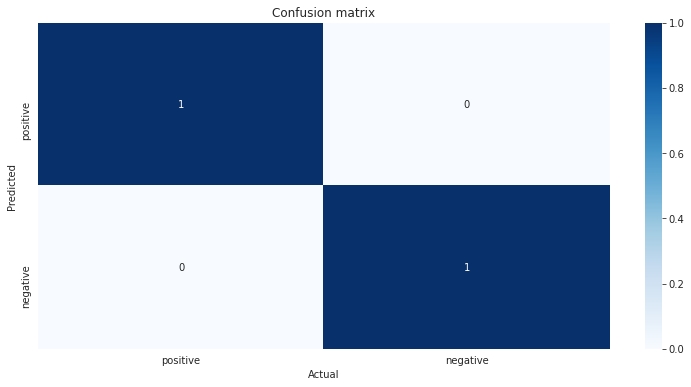

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
features_time = features_train
elapsed_list = []
for i in range(0,10):

    start = time.time()
    predictions = best_rfc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)

In [ ]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

1.0

In [ ]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

1.0

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,1.0,1.0


In [ ]:
with open('best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)

## KNN

In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Dataframe
path_df = "df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)


In [ ]:
print(features_train.shape)
print(features_test.shape)

(6, 32)
(2, 32)


In [ ]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())


Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [ ]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
print(n_neighbors)
param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

[1, 2, 3]
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 2}

The mean accuracy of a model with these hyperparameters is:
0.5


In [ ]:
n_neighbors = [1,2,3]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=1)

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 2}

The mean accuracy of a model with these hyperparameters is:
0.5


In [ ]:
best_knnc = grid_search.best_estimator_

In [ ]:

best_knnc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:

knnc_pred = best_knnc.predict(features_test)

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
0.5


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.5


In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



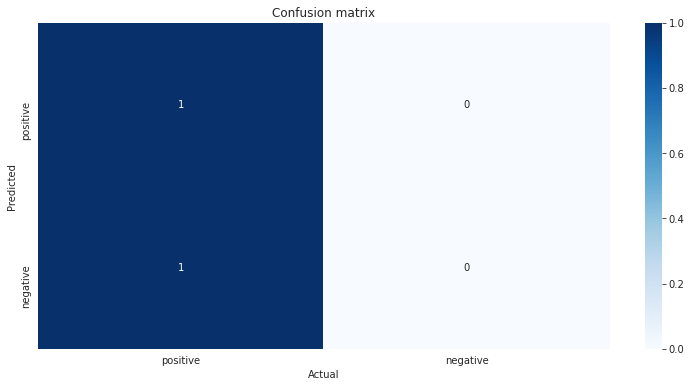

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.5

In [ ]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.5

In [ ]:

d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.5,0.5


In [ ]:

with open('best_knnc.pickle', 'wb') as output:
    pickle.dump(best_knnc, output)

with open('df_models_knnc.pickle', 'wb') as output:
    pickle.dump(df_models_knnc, output)

##Support vector Machine


In [ ]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### load the data:


In [ ]:
# Dataframe
path_df = "df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [ ]:
print(features_train.shape)
print(features_test.shape)

(6, 32)
(2, 32)


### Cross-Validation for Hyperparameter tuning

In [ ]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


### Randomized Search Cross Validation

In [ ]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


### Performing the Random Search:

In [ ]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=8,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', random_s

### Seeing best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'rbf', 'gamma': 100, 'degree': 3, 'C': 0.001}

The mean accuracy of a model with these hyperparameters is:
0.6666666666666666


### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.2s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated'...one,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability':

### best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.001, 'degree': 5, 'kernel': 'poly', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.3333333333333333


In [ ]:
best_svc = grid_search.best_estimator_

In [ ]:
best_svc

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

### Model fit and performance

In [ ]:
best_svc.fit(features_train, labels_train)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_pred = best_svc.predict(features_test)

### Training accuracy

In [ ]:

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))

The training accuracy is: 
1.0


### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))

The test accuracy is: 
1.0


### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Confusion matrix

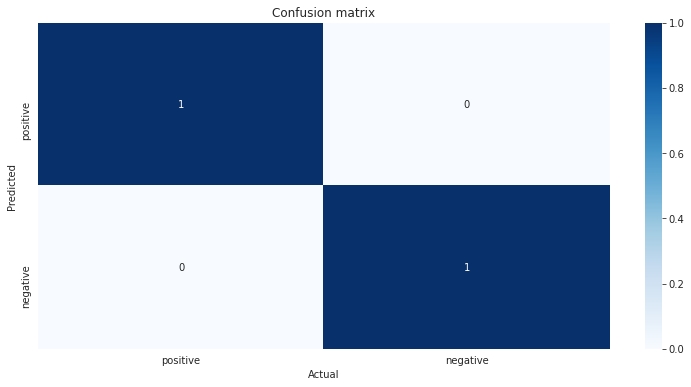

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
base_model = svm.SVC(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.5

In [ ]:
best_svc.fit(features_train, labels_train)
accuracy_score(labels_test, best_svc.predict(features_test))

1.0

In [ ]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_svc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,1.0,1.0


### Saving the model and dataset:




In [ ]:
with open('best_svc.pickle', 'wb') as output:
    pickle.dump(best_svc, output)
    
with open('df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)

# Best model selection

In [ ]:
path_pickles = ""

list_pickles = [
    "df_models_knnc.pickle",
    "df_models_rfc.pickle",
    "df_models_svc.pickle"
]

df_summary = pd.DataFrame()

for pickle_ in list_pickles:
    
    path = path_pickles + pickle_
    
    with open(path, 'rb') as data:
        df = pickle.load(data)

    df_summary = df_summary.append(df)

df_summary = df_summary.reset_index().drop('index', axis=1)

In [ ]:
df_summary

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.5,0.5
1,Random Forest,1.0,1.0
2,SVM,1.0,1.0


In [ ]:
df_summary.sort_values('Test Set Accuracy', ascending=False)

,Model,Training Set Accuracy,Test Set Accuracy
1,Random Forest,1.0,1.0
2,SVM,1.0,1.0
0,KNN,0.5,0.5
